<a href="https://colab.research.google.com/github/lagmagalhaes/EDA_Ifood/blob/main/Ifood_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Ifood - Parte 3

In [ ]:
# Importar Bibliotecas

# Importar bibioteca para manipulação de dados
import pandas as pd

# Importar biblioteca para operações matematicas
import numpy as np

# Importando biblotecas para auxiliar na visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados e ler o arquivo.csv

df = pd.read_csv("/content/drive/MyDrive/mkt_data.csv")

In [ ]:
# Mostrar o Arquivo
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


#Começamos com  Ifood - Parte 3

Queremos saber se o fato de um cliente reclamar na plataforma o torna não_cliente.

Tomando como base a coluna Complain, vamos verificar se o grupo de clientes que reclamam tem menos gastos (expense) do que os clientes que não reclamam. Use um teste paramétrico e um não paramétrico.
Discuta as diferenças:

###Vamos iniciar por comparar 2 médias de gastos: os clientes que reclamam e os clientes que não reclamam. Primeiro, vamos ver a quantidade de clientes de cada grupo.

In [ ]:
#contar os clientes  dos dois grupos
df["Complain"].value_counts()

,count
Complain,
0,2185
1,20


Podemos verificar que reclamaram 20 clientes

In [ ]:
#calcular a média para os dois grupos
df.groupby("Complain")["expenses"].mean()

,expenses
Complain,
0,564.58032
1,364.40000


Como verificamos na contagem dos grupos temos 20 clientes que reclamaram. Por isso estamos no limite de poder usar um teste paramétrico.

Para essa situação, podemos utilizar o teste t para amostras independentes, assumindo que os clientes que reclamaram não são os mesmos em ambas as amostras. Primeiramente, precisamos verificar a homogeneidade das variâncias populacionais com um teste F. Esse teste nos dirá se devemos usar o teste t para amostras com variâncias iguais ou o teste t para amostras com variâncias diferentes.

In [ ]:
#calcular as variancias
df.groupby("Complain")["expenses"].var().round(2)

,expenses
Complain,
0,332812.91
1,179818.78


A variancia da amostra do grupo que "nao reclama" é maior.

#Teste F para variância
H0: variâncias são iguais

H1: variâncias são diferentes

In [ ]:
import scipy.stats

#grupo que reclama
reclamam = df[df["Complain"] == 1].expenses

#rupo que não reclama
nao_reclamam = df[df["Complain"] == 0].expenses

df_reclama = len(reclamam) - 1 #grau de liberdade da primeira amostra

df_nao_reclama = len(nao_reclamam) - 1 #grau de liberdade da segunda amostra

F = nao_reclamam.var() / reclamam.var() #A maior variância tem que ir no numerador!

alpha = 0.05

#p-valor para o teste F
1 - scipy.stats.f.cdf(F, df_nao_reclama, df_reclama)

0.05434239363439408

Podemos ver que o p-valor está no limite! Como temos apenas 20 amostras em um dos grupos, vamos fazer um teste para variância não paramétrico.

##Levene

O teste de Levene testa a hipótese nula de que todas as amostras de entrada são de populações com variâncias iguais. O teste de Levene é uma alternativa ao teste de Bartlett de Bartlett no caso de existirem desvios significativos da normalidade.

In [ ]:
from scipy.stats import levene
levene(nao_reclamam, reclamam)

LeveneResult(statistic=2.443754914525847, pvalue=0.11813710491195226)

Como podemos verificar nos dois calculos  os p-valores deram maior do que 0.05, portanto não rejeitamos a hipótese nula e assumimos que de fato as variâncias dos dois grupos são iguais.

##Teste t para 2 médias
H0: médias são iguais

H1: médias são diferentes

In [ ]:
import scipy.stats as stats

#verificamos anteriormente que as variancias sao iguais
stats.ttest_ind(reclamam, nao_reclamam, equal_var=True) #vimos anteriormente que as variancias sao iguais

#retorna t e p-valor

TtestResult(statistic=-1.5478196650248075, pvalue=0.12180935471513424, df=2203.0)

O p-valor diz.nos para não rejeitar a hipótese nula, ou seja, assumimos que as médias são estatisticamente iguais a 95% de confiança.

###Vamos agora fazer um teste não paramétrico. O equivalente ao teste t para 2 amostras independentes é o mann-whitney. Desta forma vamos confirmamos se realmente rejeitamos a hipótese nula.

In [ ]:
import scipy.stats as stats

stats.mannwhitneyu(reclamam, nao_reclamam)

MannwhitneyuResult(statistic=17113.0, pvalue=0.09469749118274157)

O resultado deste teste também nos diz que de fato não devemos rejeitar H0. Portanto, consideramos que as médias de "expenses" para os dois os grupos são estatisticamente iguais a 95% de confiança

##Bootstrap

Bootstrap é um método estatístico de reamostragem que envolve a geração de múltiplas amostras a partir de uma única amostra original, com reposição. Este método é usado para estimar a distribuição de uma estatística (como a média, a mediana, o desvio padrão, etc.) e para obter intervalos de confiança ou testar hipóteses, especialmente quando a amostra original é pequena ou quando as suposições de métodos paramétricos não são atendidas.

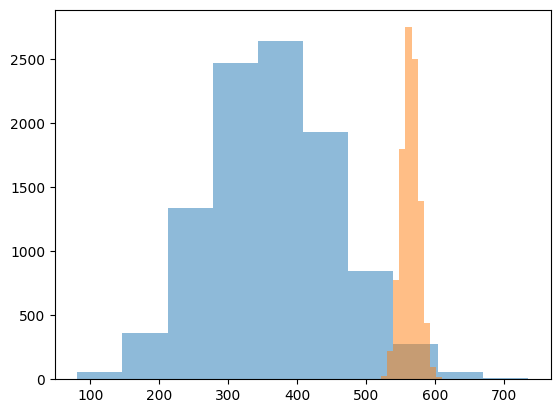

In [ ]:
import matplotlib.pyplot as plt

means = [] #alocar as médias
media_reclamam = [] #alocar as médias de clientes que reclamaram
media_naoreclamam = [] #alocar as médias de clientes que não reclamaram


for i in range (10000): #criando reamostragens

    reclamam = df[df["Complain"] == 1].expenses.sample(len(df[df["Complain"] == 1].expenses), replace = True).mean()
    nao_reclamam = df[df["Complain"] == 0].expenses.sample(len(df[df["Complain"] == 0].expenses), replace = True).mean()

    media_reclamam.append(reclamam) #aloca a média de clientes que não reclamaram
    media_naoreclamam.append(nao_reclamam) #aloca a média de clientes que não reclamaram

    means.append(reclamam - nao_reclamam) #calcula a diferença das médias

#Lets plot this
plt.hist(media_reclamam, alpha=0.5);
plt.hist(media_naoreclamam, alpha=0.5);

In [ ]:
nao_reclamam.round(2)

553.16

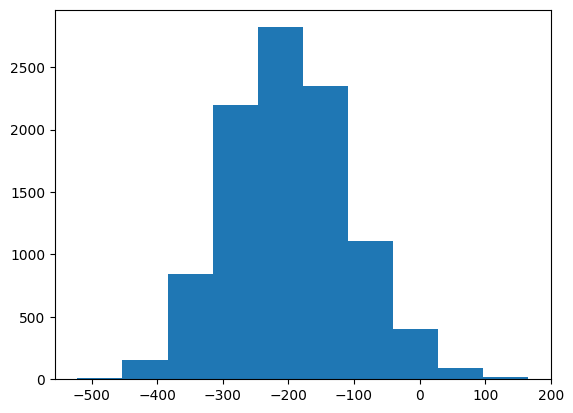

In [ ]:
plt.hist(means);

In [ ]:
import numpy as np
a = np.array(means)

pinf = np.percentile(a, 2.5) # percentil 2.5

psup = np.percentile(a, 97.5) # percentil 2.5

print(pinf,psup)

-370.5528203661328 -5.347717391304368


Com o bootstrap mostra que as amostras são de fato diferentes, uma vez que o intervalo de confiança não passa pelo zero.

O nosso objetivo era verificar se o grupo de clientes que reclama tem menos gastos do que os clientes que não reclamam, mas, como vimos nos testes que fizemos anteriormente, o resultado é inconclusivo. Dois dos testes indicam para não rejeitar H0, o que significa que consideramos que as médias de "expanses" para os dois grupos são estatisticamente iguais com um nível de confiança de 95%. O método de bootstrap, por outro lado, rejeita H0. Como estamos a trabalhar muito próximo do alfa e de n, e fizemos 3 testes diferentes que não concordam entre si, o resultado mantém-se incerto.